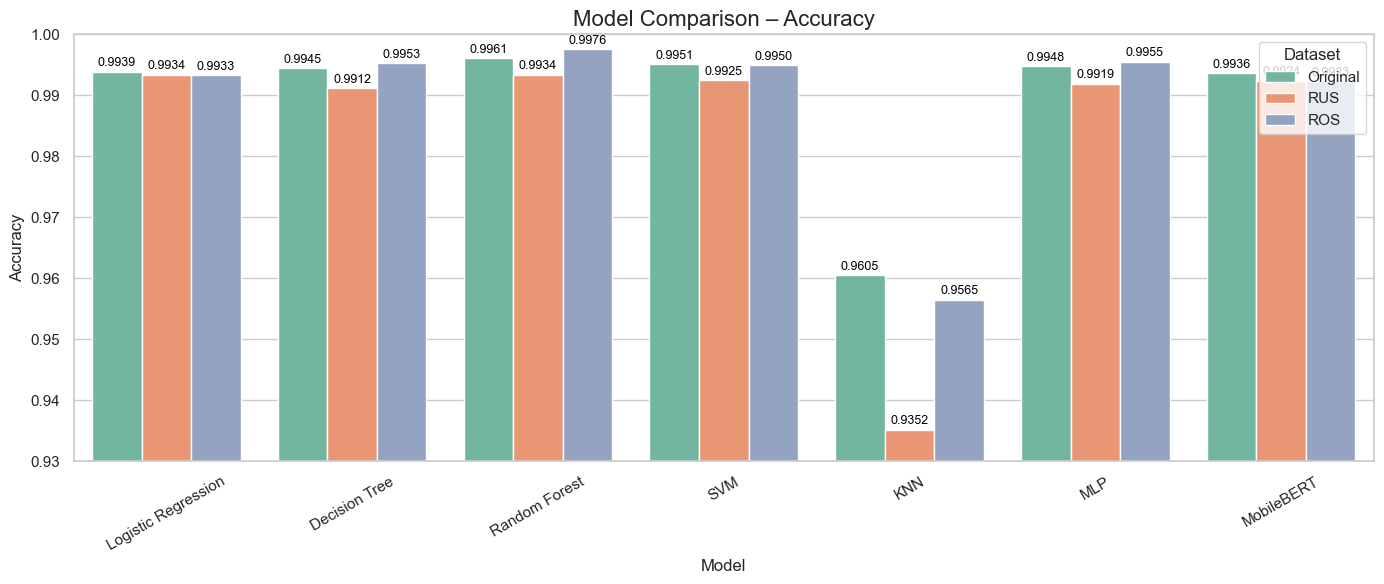

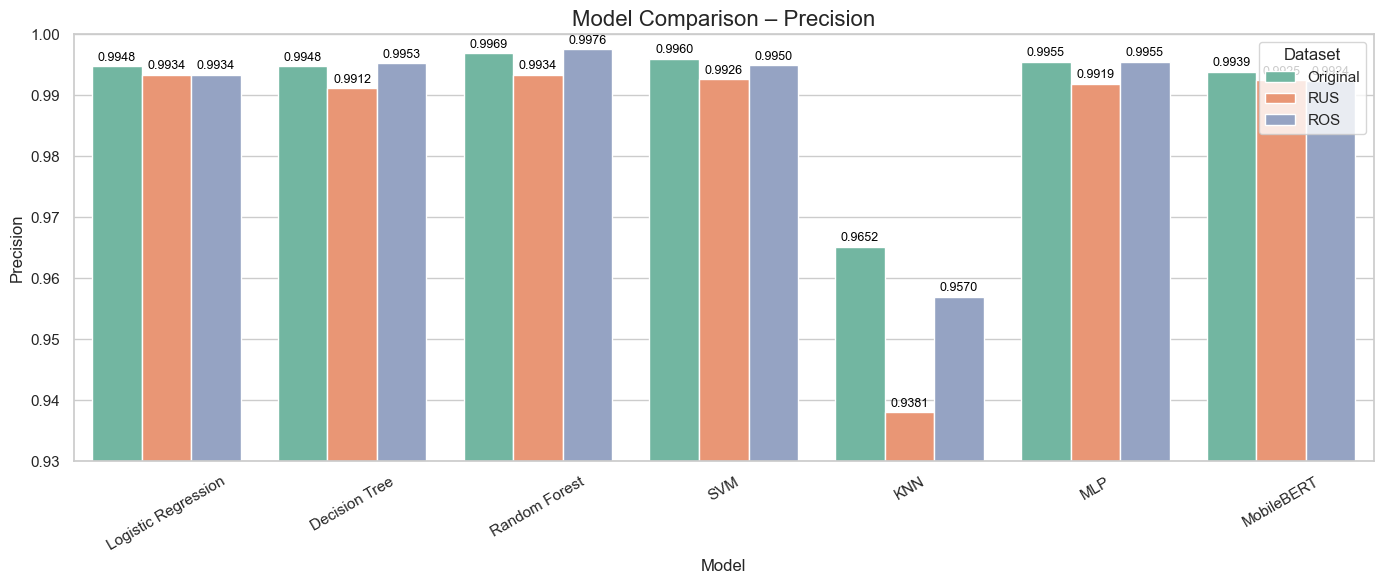

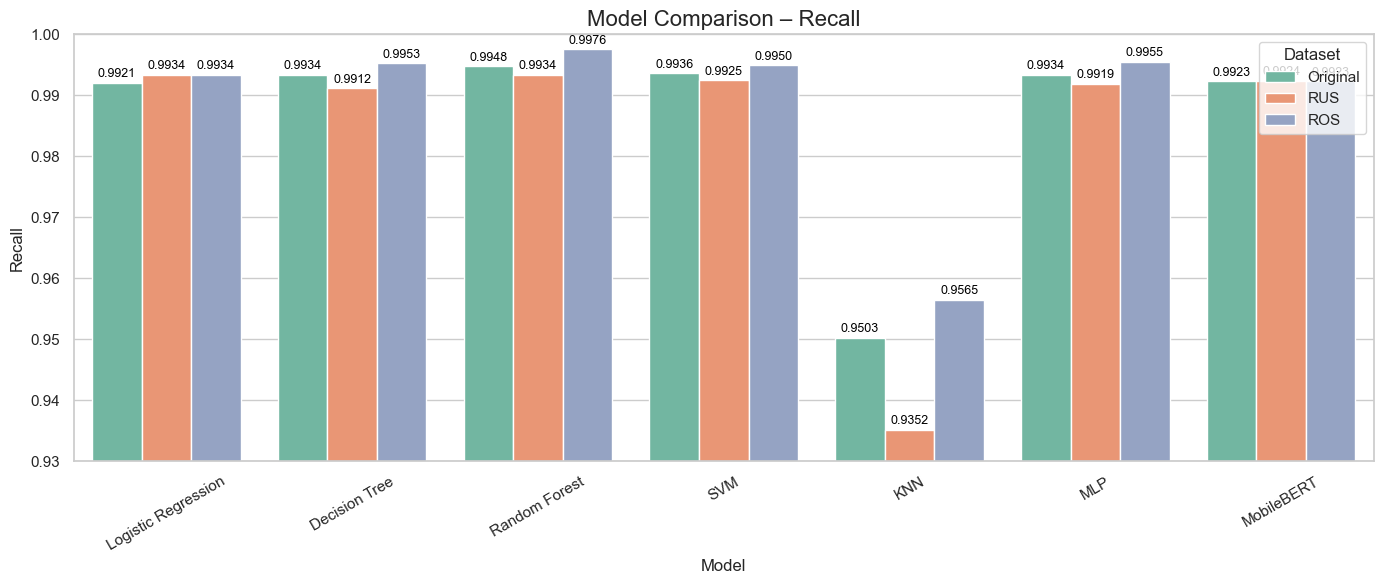

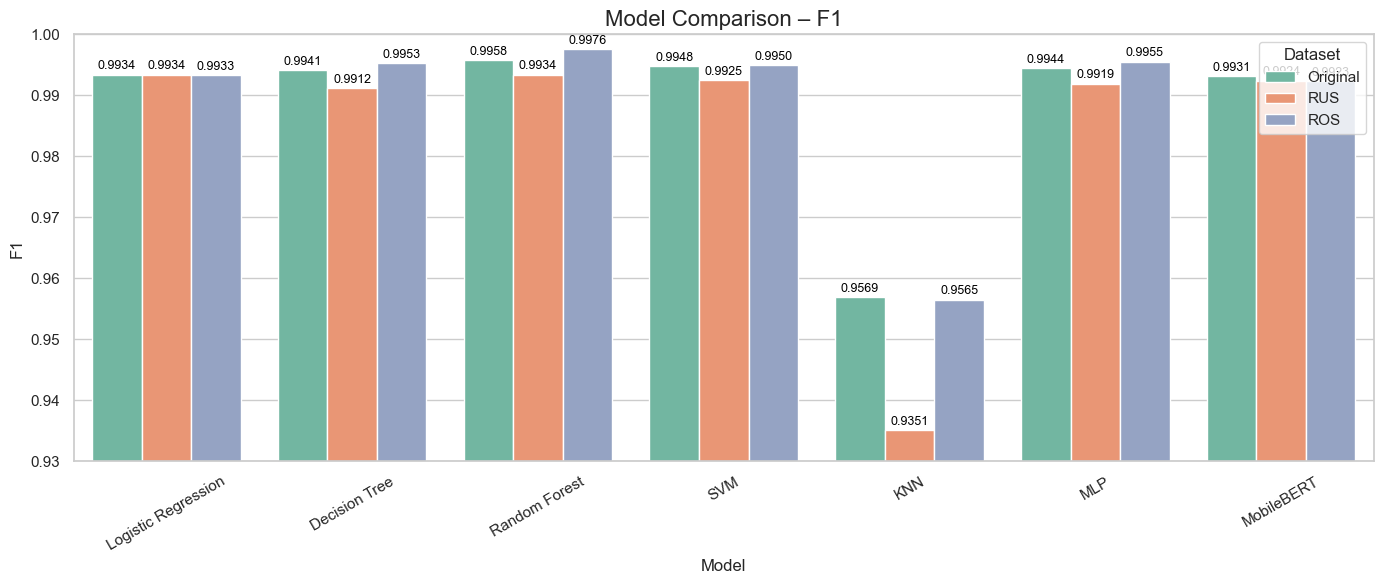

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Model evaluation metrics
combined_results = [
    {"Model": "Logistic Regression", "Dataset": "Original", "Accuracy": 0.9939, "Precision": 0.9948, "Recall": 0.9921, "F1": 0.9934},
    {"Model": "Logistic Regression", "Dataset": "RUS", "Accuracy": 0.9934, "Precision": 0.9934, "Recall": 0.9934, "F1": 0.9934},
    {"Model": "Logistic Regression", "Dataset": "ROS", "Accuracy": 0.9933, "Precision": 0.9934, "Recall": 0.9934, "F1": 0.9933},

    {"Model": "Decision Tree", "Dataset": "Original", "Accuracy": 0.9945, "Precision": 0.9948, "Recall": 0.9934, "F1": 0.9941},
    {"Model": "Decision Tree", "Dataset": "RUS", "Accuracy": 0.9912, "Precision": 0.9912, "Recall": 0.9912, "F1": 0.9912},
    {"Model": "Decision Tree", "Dataset": "ROS", "Accuracy": 0.9953, "Precision": 0.9953, "Recall": 0.9953, "F1": 0.9953},

    {"Model": "Random Forest", "Dataset": "Original", "Accuracy": 0.9961, "Precision": 0.9969, "Recall": 0.9948, "F1": 0.9958},
    {"Model": "Random Forest", "Dataset": "RUS", "Accuracy": 0.9934, "Precision": 0.9934, "Recall": 0.9934, "F1": 0.9934},
    {"Model": "Random Forest", "Dataset": "ROS", "Accuracy": 0.9976, "Precision": 0.9976, "Recall": 0.9976, "F1": 0.9976},

    {"Model": "SVM", "Dataset": "Original", "Accuracy": 0.9951, "Precision": 0.9960, "Recall": 0.9936, "F1": 0.9948},
    {"Model": "SVM", "Dataset": "RUS", "Accuracy": 0.9925, "Precision": 0.9926, "Recall": 0.9925, "F1": 0.9925},
    {"Model": "SVM", "Dataset": "ROS", "Accuracy": 0.9950, "Precision": 0.9950, "Recall": 0.9950, "F1": 0.9950},

    {"Model": "KNN", "Dataset": "Original", "Accuracy": 0.9605, "Precision": 0.9652, "Recall": 0.9503, "F1": 0.9569},
    {"Model": "KNN", "Dataset": "RUS", "Accuracy": 0.9352, "Precision": 0.9381, "Recall": 0.9352, "F1": 0.9351},
    {"Model": "KNN", "Dataset": "ROS", "Accuracy": 0.9565, "Precision": 0.9570, "Recall": 0.9565, "F1": 0.9565},

    {"Model": "MLP", "Dataset": "Original", "Accuracy": 0.9948, "Precision": 0.9955, "Recall": 0.9934, "F1": 0.9944},
    {"Model": "MLP", "Dataset": "RUS", "Accuracy": 0.9919, "Precision": 0.9919, "Recall": 0.9919, "F1": 0.9919},
    {"Model": "MLP", "Dataset": "ROS", "Accuracy": 0.9955, "Precision": 0.9955, "Recall": 0.9955, "F1": 0.9955},

    {"Model": "MobileBERT", "Dataset": "Original", "Accuracy": 0.9936, "Precision": 0.9939, "Recall": 0.9923, "F1": 0.9931},
    {"Model": "MobileBERT", "Dataset": "RUS", "Accuracy": 0.9924, "Precision": 0.9925, "Recall": 0.9924, "F1": 0.9924},
    {"Model": "MobileBERT", "Dataset": "ROS", "Accuracy": 0.9923, "Precision": 0.9924, "Recall": 0.9923, "F1": 0.9923},
]

# Convert to DataFrame
df = pd.DataFrame(combined_results)

# Set seaborn theme
sns.set(style="whitegrid")

# Plot all metrics
metrics = ["Accuracy", "Precision", "Recall", "F1"]
for metric in metrics:
    plt.figure(figsize=(14, 6))
    ax = sns.barplot(data=df, x="Model", y=metric, hue="Dataset", palette="Set2")
    plt.title(f"Model Comparison – {metric}", fontsize=16)
    plt.ylim(0.93, 1.0)
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.xticks(rotation=30)
    plt.legend(title="Dataset", loc='upper right')
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.4f}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=9, color='black', xytext=(0, 6),
                    textcoords='offset points')
    plt.tight_layout()
    plt.show()


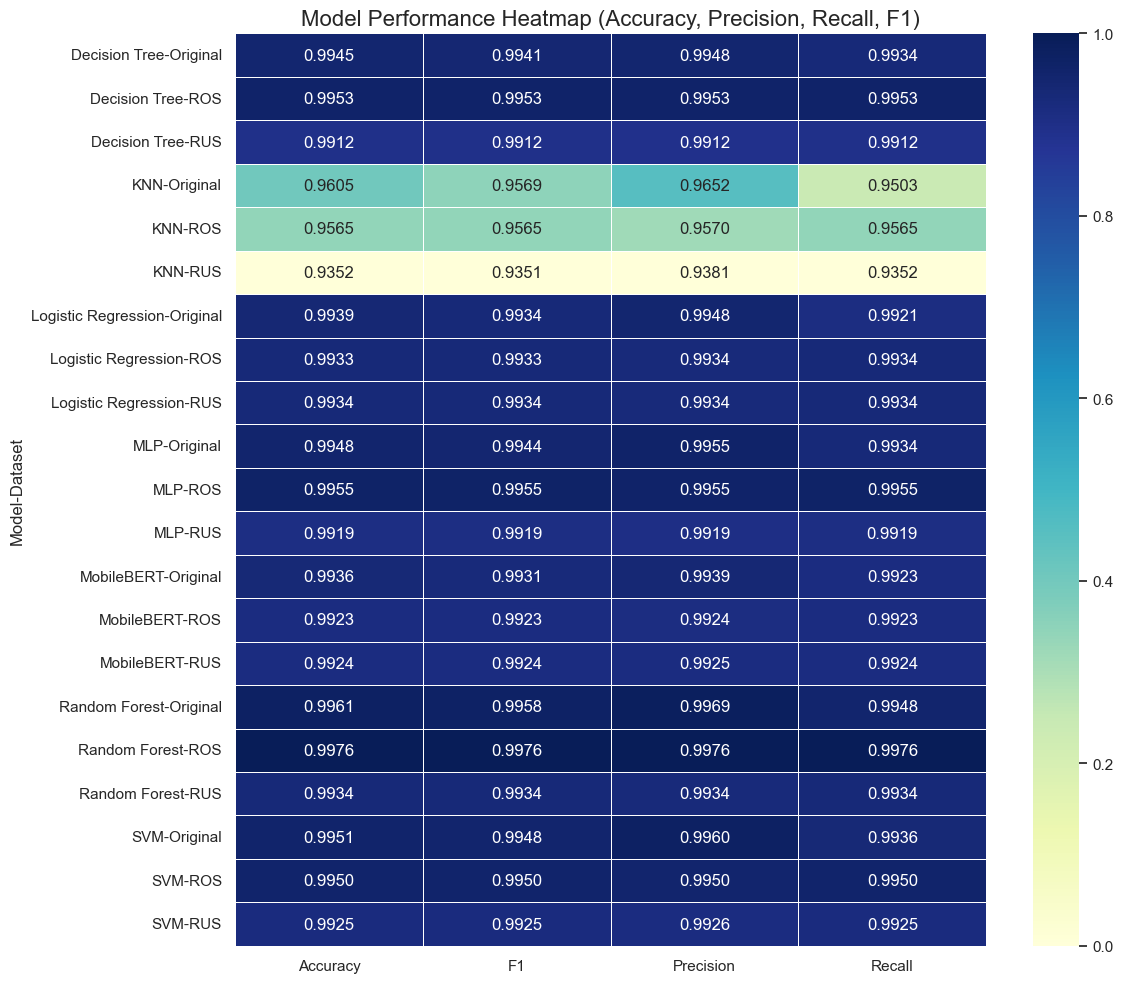

In [3]:
# Pivot for heatmap
heatmap_data = df.pivot_table(index=["Model", "Dataset"], values=["Accuracy", "Precision", "Recall", "F1"])

# Normalize for better heatmap scale
normalized = (heatmap_data - heatmap_data.min()) / (heatmap_data.max() - heatmap_data.min())

# Plotting
plt.figure(figsize=(12, 10))
sns.heatmap(normalized, annot=heatmap_data.round(4), cmap="YlGnBu", fmt=".4f", linewidths=.5)
plt.title("Model Performance Heatmap (Accuracy, Precision, Recall, F1)", fontsize=16)
plt.tight_layout()
plt.show()